Загрузите данные из файла global_power_plant_database.csv (https://drive.google.com/file/d/1S4TJpDqYwXzyIomrinpYHYbowWrdsAyv/view?usp=sharing). Рассчитайте среднее значение, моду, медиану, среднее квадратичное отклонение, смещенную и несмещенную дисперсию для capacity_mw и estimated_generation_gwh. Определите первый, второй и третий квартили. Визуализируйте данные с помощью гистограммы и boxplot (не забудьте про подписи к переменным и названия графиков).

Таблица содержит следующие поля:

country - страна расположения;

name - название электростанции;

capacity_mw - мощность электростанции в гигаваттах;

primary_fuel - используемый источник энергии;

latitude - географическая широта расположения электростанции в градусах; WGS84 (EPSG:4326);

longitude - географическая долгота расположения электростанции в градусах; WGS84 (EPSG:4326);

estimated_generation_gwh - прогнозируемая выработка электричества в гигаватт-часах в 2014 году.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [240]:
def stat_characteristics(df):
    count_columns = len(df.columns)    
    names_columns = ["среднее значение",
                     "мода",
                     "медиана",
                     "среднее квадратичное отклонение",
                     "смещенная дисперсия",
                     "несмещенная дисперсия"]
    df_dist = {'columns':names_columns}
    
    def stat(df_column):
        print(type(df_column.mode()))
        return [
            df_column.mean(),
            df_column.mode()[0],
            df_column.median(),
            df_column.std(),
            df_column.var(ddof=0),
            df_column.var(ddof=1)            
        ]
        
    for i in range(0,count_columns):
        current_name_column = df.columns.tolist()[i]
        df_dist[current_name_column] = stat(df[current_name_column])

    return pd.DataFrame(df_dist)      
        


In [ ]:
df = pd.read_csv('global_power_plant_database.csv', sep=";")
res_df = df[["capacity_mw","estimated_generation_gwh"]]
s = df.style.set_properties(**{'text-align': 'left'})
s.render()

In [ ]:
stat_characteristics(res_df)

In [ ]:
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>

In [119]:

nul = df[df["estimated_generation_gwh"].isnull()]
res_df = res_df.drop(nul.index, axis=0)


q = res_df.iloc[:, [1]]# получение столбца по индесу
x1.columns.tolist()[1]# получение имени столбца по индесу


'estimated_generation_gwh'

In [129]:
d = {}
d["fffff"] =44
d["fff444ff"] = [1,5,7,8]
d

{'fffff': 44, 'fff444ff': [1, 5, 7, 8]}

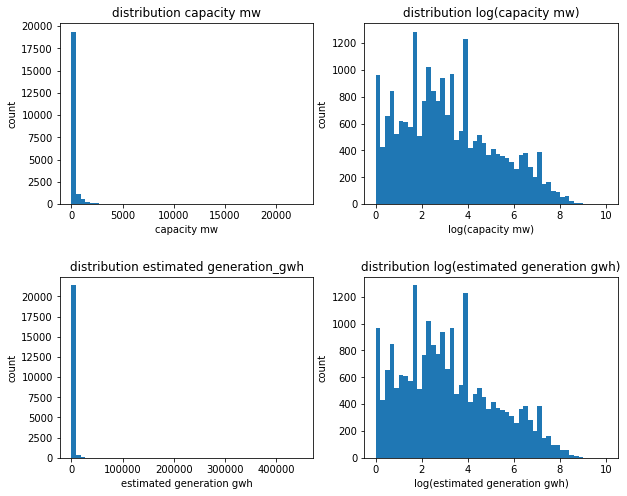

In [73]:
x1 = res_df['capacity_mw']
log_x1 = np.log(x1)
x2 = res_df['estimated_generation_gwh']
log_x2 = np.log(x1)
bins = 50

fig, ax = plt.subplots(nrows=2, ncols=2)
ax1,ax2,ax3,ax4 = ax.flatten()

fig.set_size_inches(10, 8)

ax1.hist(x1, bins=bins)
ax1.set_title("distribution capacity mw")
ax1.set_xlabel("capacity mw")
ax1.set_ylabel("count")

ax2.hist(log_x1, bins=bins)
ax2.set_title("distribution log(capacity mw)")
ax2.set_xlabel("log(capacity mw)")
ax2.set_ylabel("count")

ax3.hist(x2, bins=bins)
ax3.set_title("distribution estimated generation_gwh")
ax3.set_xlabel("estimated generation gwh")
ax3.set_ylabel("count")

ax4.hist(log_x2, bins=bins)
ax4.set_title("distribution log(estimated generation gwh)")
ax4.set_xlabel("log(estimated generation gwh)")
ax4.set_ylabel("count")
fig.subplots_adjust(wspace=0.2, hspace=0.4)


In [125]:
res_df['capacity_mw'].columns.tolist()

AttributeError: 'Series' object has no attribute 'columns'

Text(0, 0.5, 'estimated generation gwh')

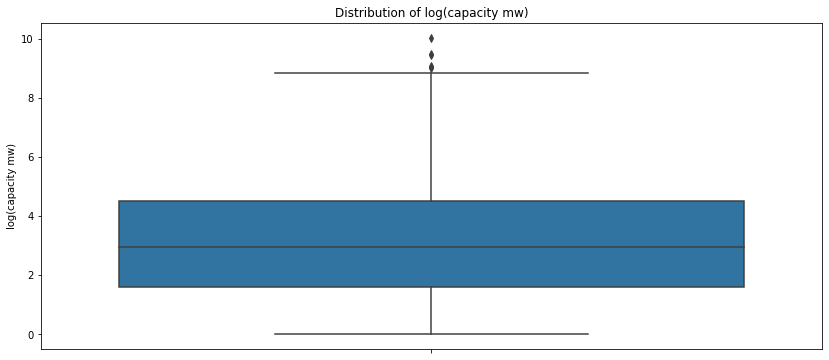

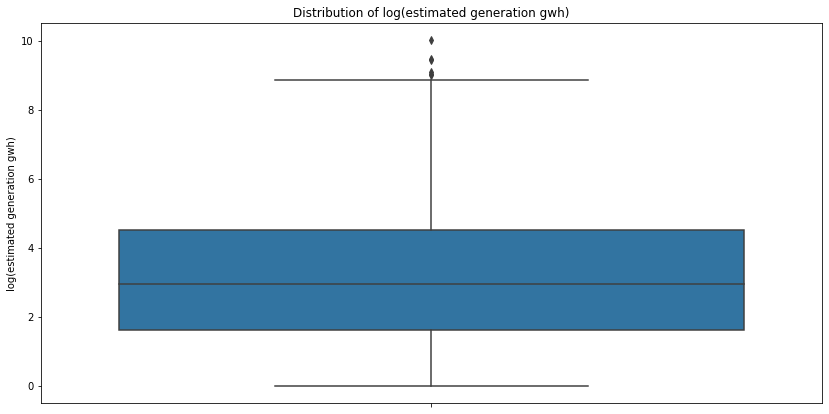

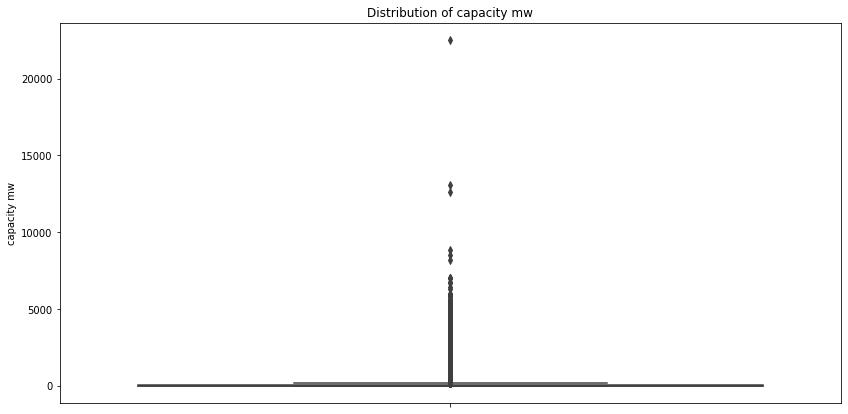

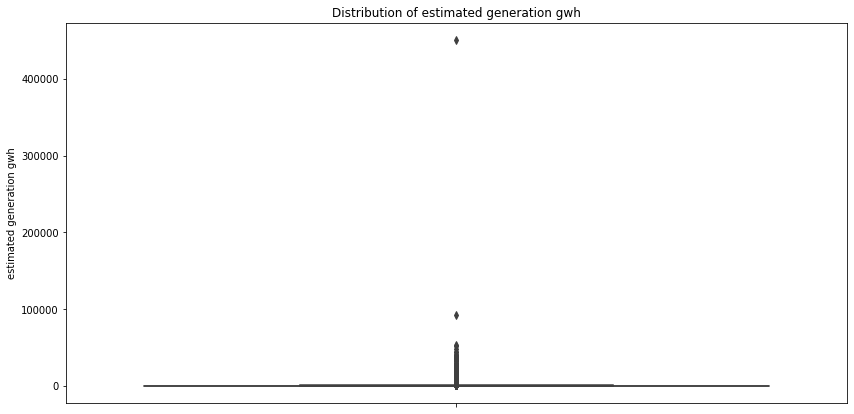

In [97]:
plt.figure(figsize=(14, 6))
sns.boxplot(log_x1, orient='v')
plt.ylabel('log(capacity mw)')
plt.title('Distribution of log(capacity mw)');

plt.figure(figsize=(14, 7))
sns.boxplot(log_x2, orient='v')
plt.title('Distribution of log(estimated generation gwh)');
plt.ylabel('log(estimated generation gwh)')

plt.figure(figsize=(14, 7))
sns.boxplot(x1, orient='v')
plt.title('Distribution of capacity mw');
plt.ylabel('capacity mw')

plt.figure(figsize=(14, 7))
sns.boxplot(x2, orient='v')
plt.title('Distribution of estimated generation gwh');
plt.ylabel('estimated generation gwh')